In [1]:
#!pip install tensorflow-gpu

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Importing the dataset
from tensorflow.keras.datasets import cifar10

In [6]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [7]:
class_names=["0: airplane","1: automobile","2: bird","3: cat","4: deer","5: dog","6: frog","7: horse","8: ship","9: truck"]

In [8]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [9]:
x_train.max(),x_train.min(),x_train.mean()

(255, 0, 120.70756512369792)

In [10]:
y_train.max(),y_train.min()

(9, 0)

In [11]:
# Normalizing the images
x_train=x_train/255.0
x_test=x_test/255.0

In [12]:
x_train.max(),x_train.min(),x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [13]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

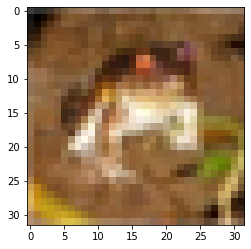

In [14]:
plt.imshow(x_train[0])

In [15]:
y_train[0]

array([6], dtype=uint8)

## BUILDING THE CNN

In [16]:
# Defining the object
model=tf.keras.models.Sequential()

In [17]:
#Adding first CNN layer
# 1) filters (kernel) = 32
# 2) kernel size = 3
# 3) padding=same
# 4) activation function = ReLU
# 5) input shape = (32,32,3)
model.add(tf.keras.layers.Conv2D(32,3,padding="same",activation="relu",input_shape=(32,32,3)))

In [18]:
# Adding 2nd CNN and maxpool layer
model.add(tf.keras.layers.Conv2D(32,3,padding="same",activation="relu"))
#maxpool parameters:
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))

In [19]:
# Adding 3rd CNN layer
model.add(tf.keras.layers.Conv2D(64,3,padding="same",activation="relu"))

In [20]:
# Adding 4th CNN and maxpool layer
model.add(tf.keras.layers.Conv2D(64,3,padding="same",activation="relu"))
#maxpool parameters:
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))

In [21]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [22]:
#Adding the flatten layer
model.add(tf.keras.layers.Flatten())

In [23]:
# Adding 1st Dense layers
model.add(tf.keras.layers.Dense(units=128,activation="relu"))

In [24]:
#Adding the 2nd dense layer (Output layer)
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [26]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["sparse_categorical_accuracy"])

In [27]:
model.fit(x_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
5000/5000 [==============================] - 27s 3ms/step - loss: 1.4056 - sparse_categorical_accuracy: 0.4881
Epoch 2/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.9920 - sparse_categorical_accuracy: 0.6490
Epoch 3/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.8490 - sparse_categorical_accuracy: 0.6996
Epoch 4/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.7601 - sparse_categorical_accuracy: 0.7348
Epoch 5/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.6920 - sparse_categorical_accuracy: 0.7555
Epoch 6/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.6388 - sparse_categorical_accuracy: 0.7737
Epoch 7/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.5963 - sparse_categorical_accuracy: 0.7881
Epoch 8/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.5630 - sparse_categorical_accuracy: 0.8025
Epoch 9/10
5000/5000 [==

## MODEL EVALUATION AND PERFORMANCE

In [28]:
# evaluate the model performance
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7913 - sparse_categorical_accuracy: 0.7468


In [29]:
test_acc

0.7468000054359436

In [33]:
# Predictions
predict_x=model.predict(x_test) 
y_pred=np.argmax(predict_x,axis=1)

In [42]:
y_pred[101]==y_test[101]

array([ True])

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[837  22  13  17  16   8   8  11  39  29]
 [ 10 915   2   3   2   1   6   1  15  45]
 [ 77  10 504  56 109  97  78  47  11  11]
 [ 16  17  30 521  54 224  71  49   8  10]
 [ 32   1  31  61 640  55  60 115   3   2]
 [ 12   3  13 124  32 729  13  62   3   9]
 [ 10   7  21  43  18  49 827  12   9   4]
 [ 13   3  10  19  23  43   8 868   1  12]
 [ 76  43   6  11   9   6   6   4 803  36]
 [ 20 107   3   8   0   9   3   5  21 824]]


In [39]:
acc_cm = accuracy_score(y_test,y_pred)

In [40]:
acc_cm

0.7468